In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(0)

data_train = pd.read_csv("/kaggle/input/titanic/train.csv")
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")
data_train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploração do Banco de Dados



In [2]:
data_test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analisando as variaveis e suas observações, temos:
## Variáveis numéricas:
1. Age(discreta)
2. SibSp (discreta)
3. Parch(discreta)
4. Fare(contínua)
## Categóricas: 
1. Survived
2. Pclass(1,2 ou 3)
3. Sex
4. Embarked
## Outras: 
1. PassengerID(index do df)
2. Ticket
3. Name
4. Cabin

In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observamos acima que das variaveis numericas a unica que possui valores em branco é a coluna Age.

# Limpando os dataframes
Como usaremos apenas variaveis numéricas, selecionaremos apeanas as colunas Age, SibSp, Parch, Fare.

In [6]:

filtro_train=['Age','SibSp', 'Parch', 'Fare','Survived']
filtro_test= ['Age','SibSp', 'Parch', 'Fare']

train=data_train[filtro_train].dropna()
test=data_test[filtro_test].fillna(0)


# 6.2 Exploração do banco de dados
**Objetivo**: Visualizar a influência das features nas taxas de sobrevivência. Para isso, serão
criados gráficos com sns.barplot, que comparam médias de sobrevivência para diferentes faixas
ou categorias.

### 1. Idade:

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: title={'center': 'Idade x Sobrevivência'}, xlabel='AgeGroup', ylabel='Survived'>

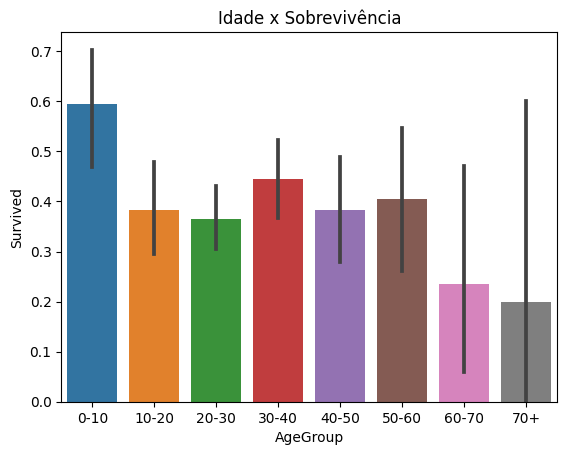

In [7]:
data_train['Age']=data_train['Age'].dropna()
data_test['Age']=data_test['Age'].fillna(0)


rótulos=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']# nomes das categorias
bins=[0,10,20,30,40,50,60,70,np.inf] #limites dos intervalos
data_train['AgeGroup']=pd.cut(data_train['Age'], bins, labels= rótulos)
data_test['AgeGroup']=pd.cut(data_test['Age'], bins, labels= rótulos)
plt.title('Idade x Sobrevivência')
sns.barplot(x='AgeGroup', y= 'Survived',data=data_train)


In [8]:
labels2 = ["Muito Baixo", "Baixo", "Médio", "Alto", "Muito Alto"]
data_train['FareGroup']=pd.cut(data_train['Fare'],5,labels2)


In [9]:
data_test['FareGroup']=pd.cut(data_test['Fare'],5,labels2)

Interpretando o gráfico acima, observamos que a maior taxa de sobrevivência é registrada na menor faixa etária (contraintuitivo?). Devemos levar em conta que os valores faltantes foram filtrados para 0, fato que influencia na estatística dos dados.

### 2. SibSp (irmãos/cônjuges a bordo)

<Axes: title={'center': 'Irmãos/cônjuges vs Sobrevivência'}, xlabel='SibSp', ylabel='Survived'>

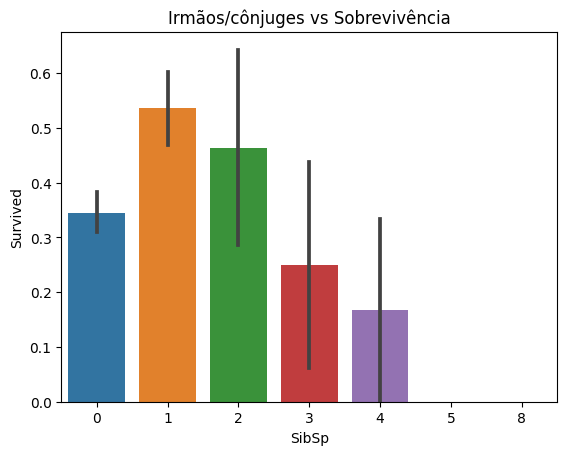

In [10]:
plt.title('Irmãos/cônjuges vs Sobrevivência')
sns.barplot(x='SibSp', y='Survived', data=data_train)


O gráfico mostra que a maior parte dos sobreviventes possuia entre 1 e 2 companheiros a bordo


### 3. Parch (pais e filhos a bordo)

<Axes: xlabel='Parch', ylabel='Survived'>

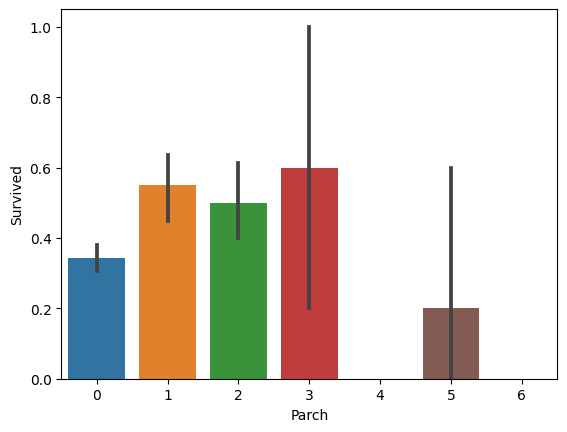

In [11]:
sns.barplot(x='Parch', y='Survived', data=data_train)


Podemos concluir que pessoas com mais de 4 filhos/pais a bordo tem menos chances de sobreviver se comparado a pessoas com menos de 4 filhos.

## 6.3 Treinamento do modelo 

Anteriormente criamos os df's train e test, que são dados limpos e prontos para serem utilizados para a modelagem. Dessa forma:

In [12]:
from sklearn.model_selection import train_test_split

X=train[['SibSp','Parch','Fare','Age']] #features
y=train['Survived'] #target
train_X, val_X, train_y, val_y =train_test_split(X,y, test_size=0.2, random_state=0) #separação entre treino e validação


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model= RandomForestClassifier(random_state=1)
rf_model.fit(train_X,train_y)
pred_y=rf_model.predict(val_X)
accuracy=accuracy_score(val_y,pred_y)
print('A precisão do modelo é de {:.2f} %'.format(accuracy*100))

A precisão do modelo é de 65.03 %


### Discussão do Resultado: 
O resultado obtido foi abaixo do esperado, uma vez que o nosso modelo é um pouco mais eficiente que o acaso(considerando 50%), logo, não hágrandes vantagens em utilizá-lo ao invés de um simples chute. Podemos buscar melhorias aumentando o numero de features, tendo em vista que as variaveis categoricas nao foram utilizadas. Desse modo, temos:

In [14]:
data_train.isnull().sum() #retornaremos ao dataset inicial e geraremos um novo df de treino

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
FareGroup        0
dtype: int64

In [15]:
data_train['AgeGroup']=data_train['AgeGroup'].fillna('20-30')
data_train['Age']=data_train['Age'].fillna(data_train['Age'].median())


o código acima substitui valores de idade faltantes pela média de idade dos tripulantes, com o intuito de não alterar muito a estatística dos dados.

In [16]:
data_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
data_train['Embarked']=data_train['Embarked'].fillna('S')
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
FareGroup        0
dtype: int64

In [18]:
train2=data_train.drop(['Name','Ticket','Cabin','Age','Fare'],axis=1)
test2=data_test.drop(['Name','Ticket','Cabin','Age','Fare'],axis=1)
#test2['Fare']=test2['Fare'].fillna(test2['Fare'].mean())


Quando utilizei train2 no modelo descobri que o mesmo só aceita features numéricas, e tive que aprender a transformar as colunas 'Sex' e 'Embarked' para esse tipo de variavel categorica. Utilizei o método one hot encoding (obtive um melhor resultado utilizando a coluna AgeGroup tambem)

In [19]:
train2=pd.get_dummies(train2)
test2=pd.get_dummies(test2)
train2.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_30-40,AgeGroup_40-50,AgeGroup_50-60,AgeGroup_60-70,AgeGroup_70+,"FareGroup_(-0.512, 102.466]","FareGroup_(102.466, 204.932]","FareGroup_(204.932, 307.398]","FareGroup_(307.398, 409.863]","FareGroup_(409.863, 512.329]"
0,1,0,3,1,0,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,1,1,1,0,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
2,3,1,3,0,0,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,1,0,True,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
4,5,0,3,0,0,False,True,False,False,True,...,True,False,False,False,False,True,False,False,False,False


Após o tratamento, podemos testar o modelo novamente com o novo conjunto de dados

In [20]:
X2=train2.drop(['PassengerId','Survived'],axis=1)#features
y2=train2['Survived']#target
train_X2, val_X2, train_y2, val_y2= train_test_split(X2,y2, test_size=0.2, random_state=0)
rf_model.fit(train_X2,train_y2)
pred2=rf_model.predict(val_X2)
acc2=accuracy_score(val_y2,pred2)
print('A precisão do modelo é de {:.2f} %'.format(acc2*100))


A precisão do modelo é de 82.68 %


### Conclusão:
Após as melhorias propostas tivemos uma melhora significativa no desempenho do modelo, oferecendo agora uma opção muito melhor que o acaso.

## Submissão

In [21]:
rf_model.fit(X2,y2)
ids=test2['PassengerId']

predictions=rf_model.predict(test2.drop('PassengerId',axis=1))

output=pd.DataFrame({'PassengerId':ids,'Survived':predictions})
output.to_csv('submission.csv', index=False)